<a href="https://colab.research.google.com/github/RahulParajuli/DataVisualizationandML/blob/main/NetworkXbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

In [15]:
G = nx.Graph()
G.add_edge('A','B',weight=13,relation='friend')
G.add_edge('B','C',weight=9,relation='family')
G.add_edge('B','D',weight=7,relation='friend')
G.add_edge('E','B',weight=10,relation='friend')
G.add_edge('E','A',weight=1,relation='enemy')
G.add_edge('F','B',weight=13,relation='family')
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 13, 'relation': 'friend'}), ('A', 'E', {'weight': 1, 'relation': 'enemy'}), ('B', 'C', {'weight': 9, 'relation': 'family'}), ('B', 'D', {'weight': 7, 'relation': 'friend'}), ('B', 'E', {'weight': 10, 'relation': 'friend'}), ('B', 'F', {'weight': 13, 'relation': 'family'})])

In [16]:
G.add_node('A',role='Trader')
G.add_node('B',role='Analyst')
G.add_node('C',role='Manager')
G.nodes(data=True)

NodeDataView({'A': {'role': 'Trader'}, 'B': {'role': 'Analyst'}, 'C': {'role': 'Manager'}, 'D': {}, 'E': {}, 'F': {}})

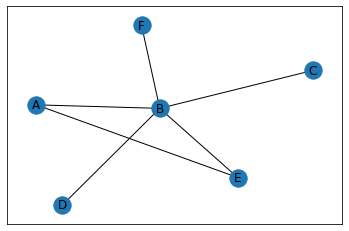

In [17]:
nx.draw_networkx(G, with_labels=True)

In [18]:
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',4),('E',1),('A',2),('E',2)])
bipartite.is_bipartite(B)

True

[('A', 1), ('A', 2), ('B', 1), ('C', 1), ('C', 3), ('D', 4), ('E', 1), ('E', 2)]


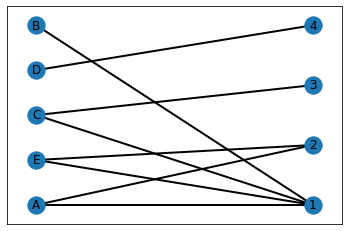

In [19]:
edges = B.edges()
nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, ['A','B','C','D','E']), 
    width = 2)
print(edges)

In [20]:
import csv
from operator import itemgetter
from networkx.algorithms import community

In [21]:
with open('/content/quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('/content/quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [22]:
print(len(node_names))

119


In [23]:
print(len(edges))

174


In [24]:
G = nx.Graph()

In [26]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [27]:
print(nx.info(G))

Graph with 119 nodes and 174 edges


In [28]:
hist_sig_dict={}
gender_dict={}
birth_dict={}
death_dict={}
id_dict={}

In [29]:
for node in nodes:
  hist_sig_dict [node[0]]=node[1]
  gender_dict[node[0]]= node[2]
  birth_dict[node[0]] = node[3]
  death_dict[node[0]]= node[4]
  id_dict[node[0]] = node[5]

In [30]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [31]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"
  

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

Network density: 0.02478279447372169


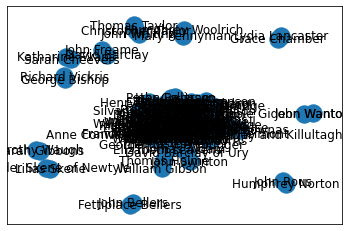

In [32]:
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)

In [33]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [34]:
print("Length of that path:", len(fell_whitehead_path)-1)


Length of that path: 2


In [35]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [36]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [37]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [38]:
print(G.nodes['William Penn'])


{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [39]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)


In [40]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [41]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [42]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [43]:
communities = community.greedy_modularity_communities(G)


In [44]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [45]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: James Nayler | Eigenvector Centrality: 0.3352974100447867
Name: Margaret Fell | Eigenvector Centrality: 0.253170949905681
Name: Francis Howgill | Eigenvector Centrality: 0.1909539378268105
Name: Richard Farnworth | Eigenvector Centrality: 0.15368535029296415
Name: Anthony Pearson | Eigenvector Centrality: 0.11120476725256784


In [46]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Thomas Aldam', 'Thomas Holme', 'William Tomlinson', 'William Gibson', 'Gervase Benson', 'Dorcas Erbery', 'George Fox the younger', 'Margaret Fell', 'Elizabeth Leavens', 'Martha Simmonds', 'Richard Farnworth', 'Thomas Lower', 'Anthony Pearson', 'Robert Rich', 'Francis Howgill', 'James Nayler', 'Hannah Stranger']
Class 1: ['Isaac Norris', 'Isabel Yeamans', 'John Bartram', 'Anne Conway Viscountess Conway and Killultagh', 'Edward Haistwell', 'James Logan', 'Thomas Story', 'David Lloyd', 'Jane Sowle', 'Joseph Besse', 'William Penn', 'Richard Claridge', 'George Keith', 'William Bradford', 'Peter Collinson', 'Tace Sowle', 'Samuel Bownas']
Class 2: ['John Perrot', 'William Coddington', 'Mary Fisher', 'Mary Prince', 'Ellis Hookes', 'Thomas Salthouse', 'Leonard Fell', 'William Mucklow', 'William Crouch', 'William Mead', 'John Crook', 'Elizabeth Hooten', 'George Fox', 'Edward Burrough', 'William Dewsbury']
Class 3: ['Gilbert Latey', 'Sir Charles Wager', 'Silvanus Bevan', 'Alexander Par

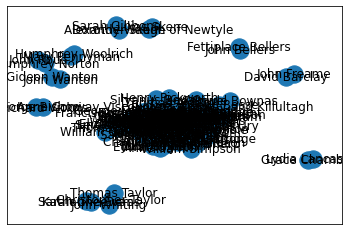

In [47]:
nx.draw_networkx(G, with_labels=True)

In [48]:
# this returns a list of set of nodes belonging to the 
# different (weakly) connected components
components = list(nx.connected_components(G))

# sort the component according to their size
components = list(sorted(components, key=lambda x:len(x), reverse=True))

In [49]:
# make a list with the size of each component
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))

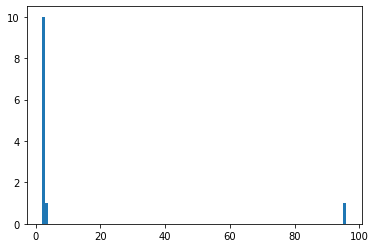

In [50]:
# plot the histogram of component sizes
hist = plt.hist(comp_sizes, bins=100)

In [51]:
# let's make a new graph which is the subgraph of G corresponding to 
# the largest connected component
# let's find the largest component
largest_comp = components[0]
LCC = G.subgraph(largest_comp)


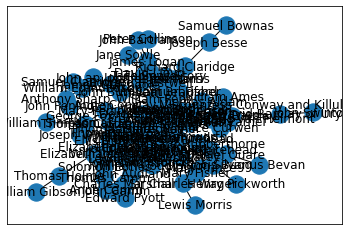

In [52]:
nx.draw_networkx(LCC, with_labels=True)